# Sampling Methods

The following are based on Chapter 11 of Gelman, et. al. (2004), *Introduction to Bayesian Computation*.

## Inverse CDF Sampling

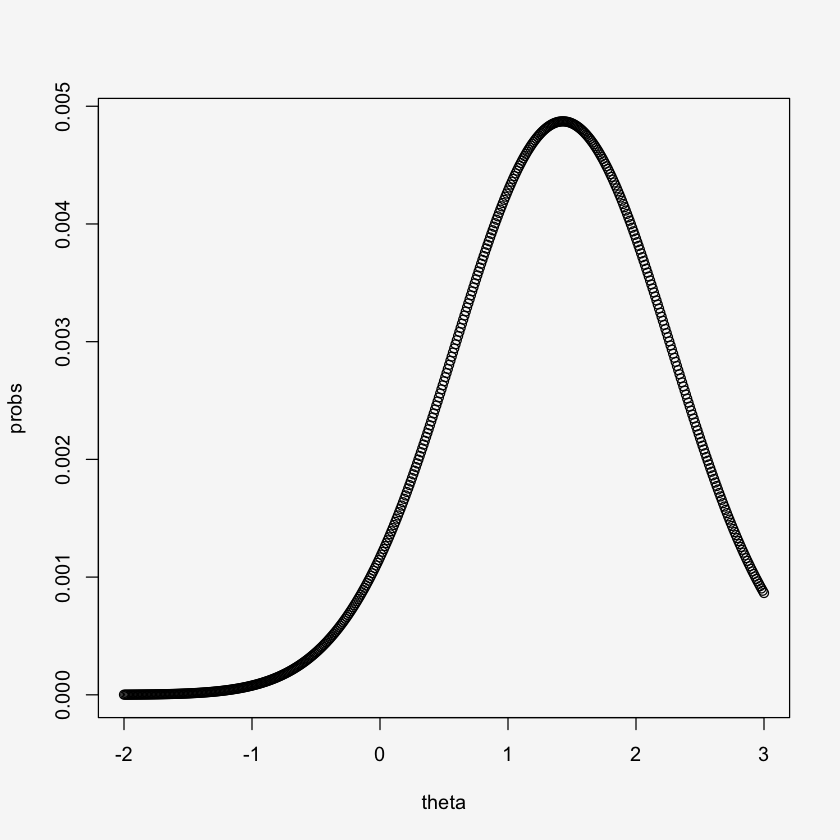

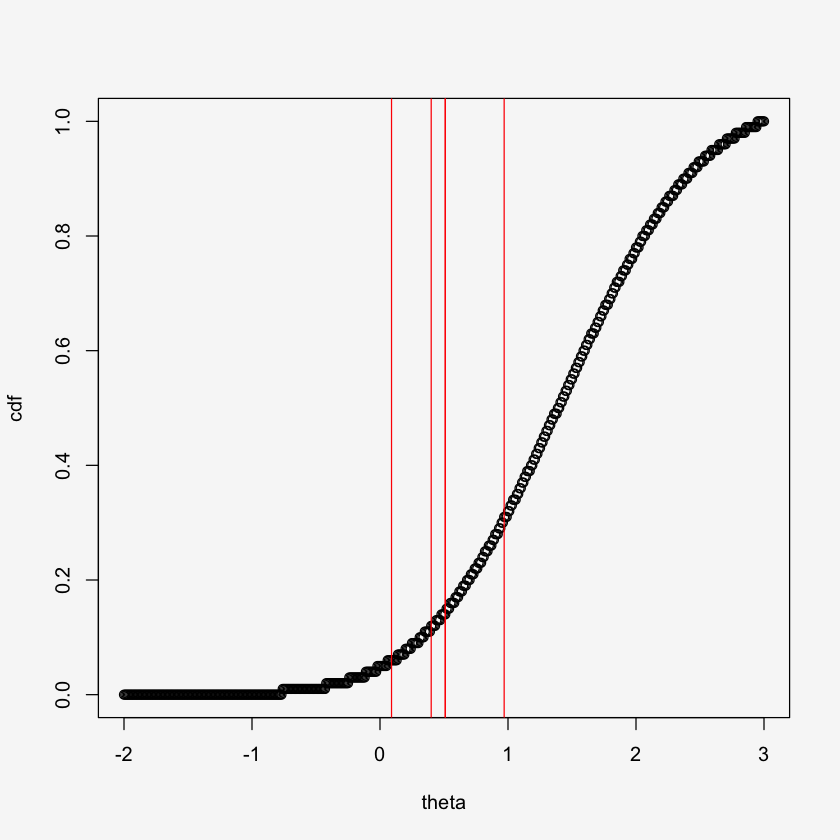

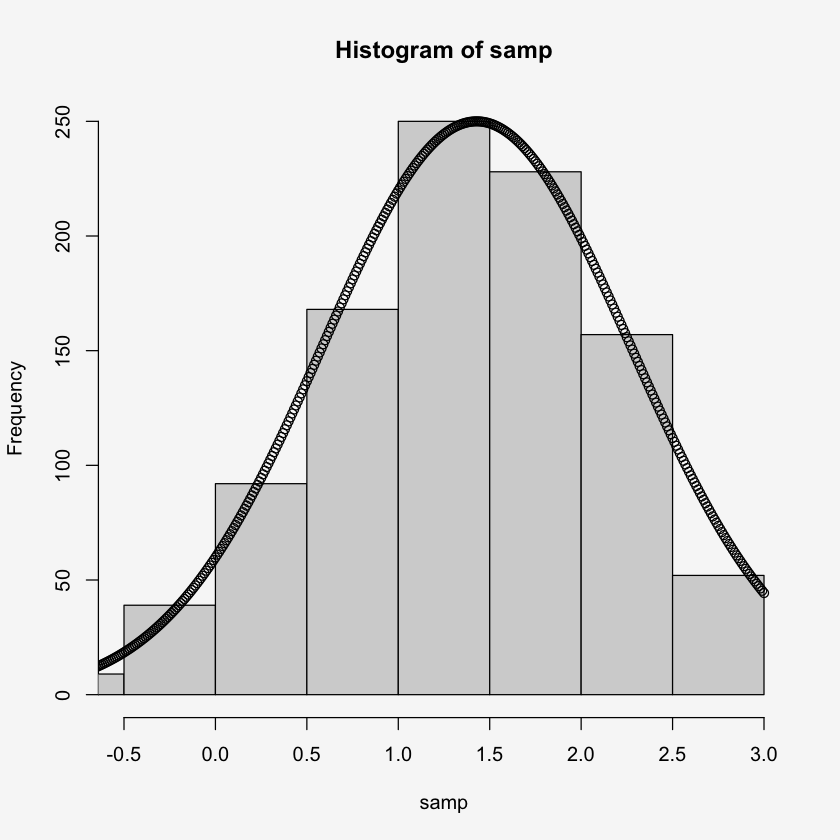

In [28]:
theta <- seq(from=-2, to=3, by=0.01)
y <- 5

probs <- sapply(theta, function(x){
  dnorm(y, mean = x, sd = 5/sqrt(10)) * dnorm(x, mean = 0, sd = 1)  
})

probs <- probs/sum(probs)
cdf<- round(cumsum(probs),2)

par(bg = "#f7f7f7")
plot(probs ~ theta)

# draw a sample of N from Uniform:
draws <- round(runif(5),2)

par(bg = "#f7f7f7")
plot(cdf ~ theta)
for(i in 1:length(draws)){
  abline(v = draws[i], col="red")
}

invcdf <- function(r) theta[sum(cdf < r) + 1]

draws <- round(runif(1000),2)
samp <- sapply(draws, invcdf)

par(bg = "#f7f7f7")
hist(samp, breaks = 10,, xlim = c(-0.5, 3))
par(new = TRUE)
plot(probs ~ theta, xlim = c(-0.5, 3), axes = F, xlab = "", ylab = "")

## Rejection Sampling

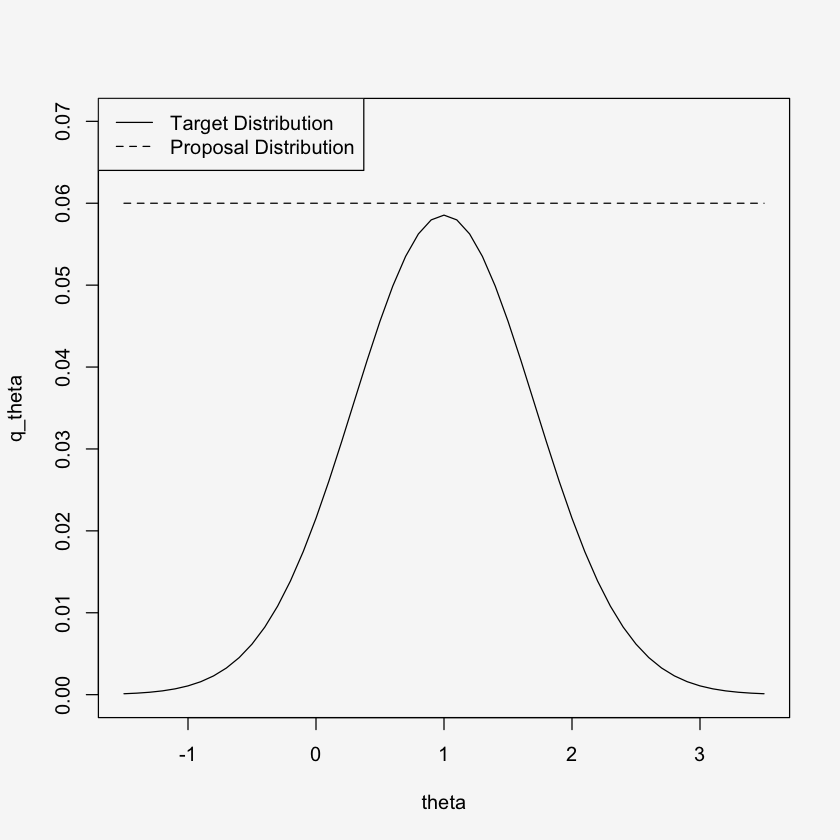

In [6]:
theta = seq(from=-1.5, to=3.5, by=0.1)
q_theta = dnorm(2, mean = theta, sd = 1) * dnorm(theta, mean = 0, sd = 1)
q = function(x) dnorm(2, mean = x, sd = 1) * dnorm(x, mean = 0, sd = 1)

g_theta = dunif(theta, min=-1.5, max=3.5)

par(bg = "#f7f7f7")
plot(q_theta ~ theta, type = "l", ylim = c(0, 0.07), lty = 1)
lines(0.3 * g_theta ~ theta, lty = 2)
legend("topleft", lty = c(1,2), legend = c("Target Distribution", "Proposal Distribution"))

In the following implementation, rejected draws are returned as missing numbers so we can have a sense of how many are rejected and how many are not rejected. In actual implementation we would only keep those that are accepted.

In [9]:
draws <- runif(1000, -1.5, 3.5)

accepted <- sapply(draws, function(x){
  prob_accept <- q(x) / (0.3 * dunif(x, -1.5, 3.5))
  accept <- rbinom(1, size=1, prob = prob_accept)
  if(accept == 1) return(x)
  return(NA)
})

head(accepted, 10)

[1]         NA  0.6101928         NA         NA  0.7355117 -0.5493258
 [7]         NA         NA  2.0946967         NA

Proportion of draws that are rejected:

In [11]:
mean(is.na(accepted))

[1] 0.65

Focusing on the samples now, we find that we obtain a very good approximation of the target distribution.

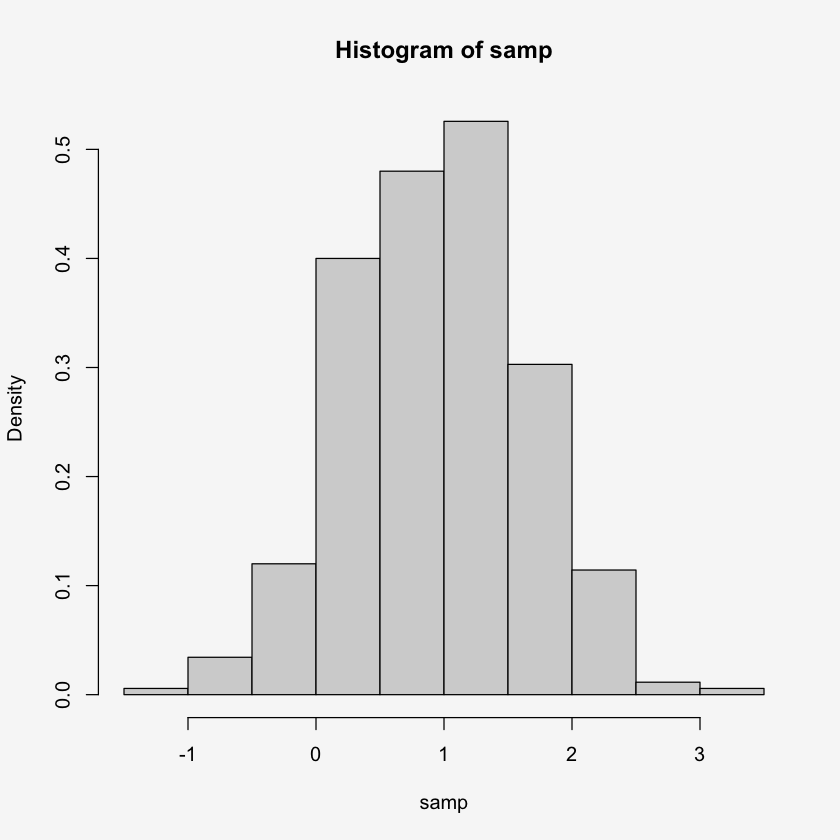

In [17]:
samp <- na.omit(accepted)

par(bg = "#f7f7f7")
hist(samp, prob = TRUE)

In [18]:
mean(samp)
var(samp)
quantile(samp, probs=c(0.025, 0.975))

[1] 0.9452393

[1] 0.4768779

2.5%      97.5% 
-0.3325756  2.2140574

## Importance Sampling

Suppose we use a proposal distribution in the form of a $N(1,1)$ density.

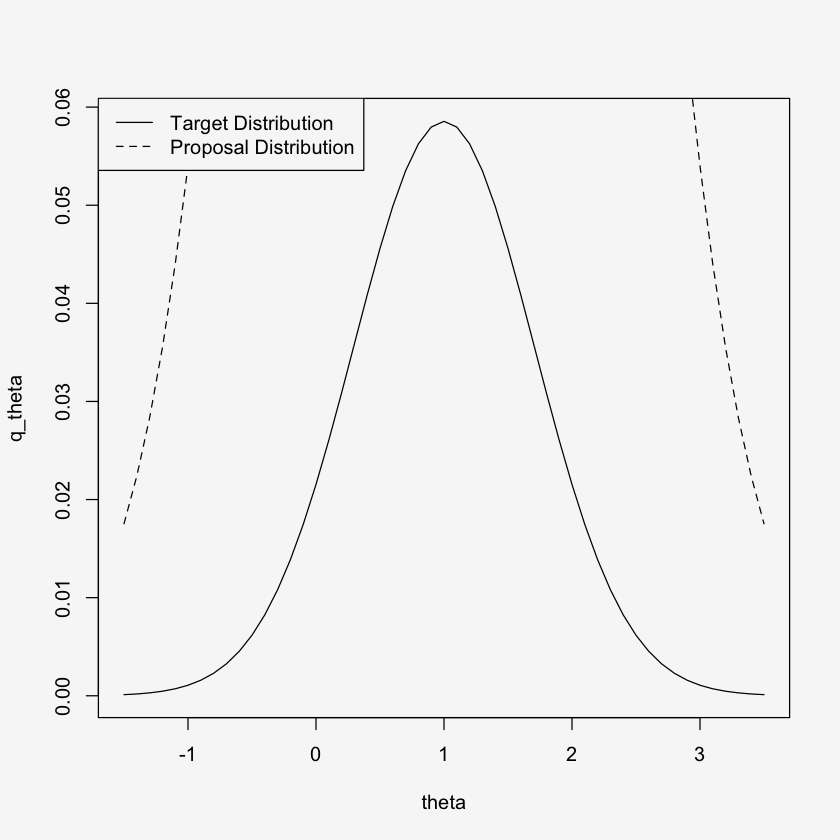

In [22]:
g_theta = dnorm(theta, mean = 1, sd=1)

par(bg = "#f7f7f7")
plot(q_theta ~ theta, type = "l", lty = 1)
lines(g_theta ~ theta, lty = 2)
legend("topleft", lty = c(1,2), legend = c("Target Distribution", "Proposal Distribution"))

We confirm that the weights $w(\theta^s) = \frac{q(\theta^s|y)}{\theta^2}$ are generally uniform

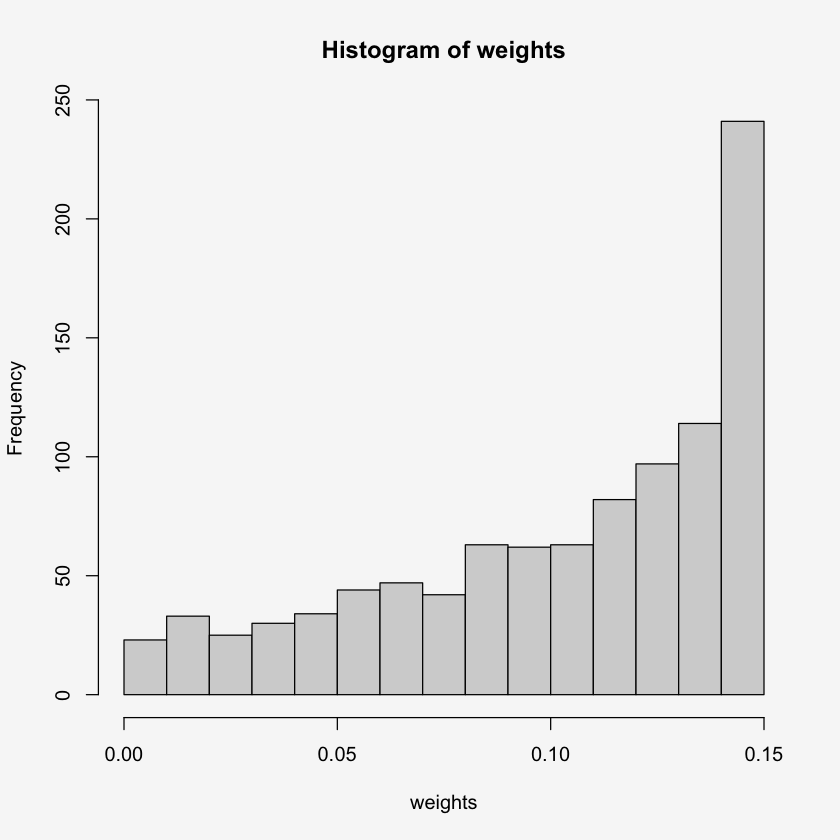

In [24]:
draws <- rnorm(1000, 1, 1)
weights <- q(draws)/dnorm(draws, 1, 1)

par(bg = "#f7f7f7")
hist(weights)

In [25]:
mean <- sum(draws * weights)/sum(weights)
variance <- sum((draws - mean)^2 * weights)/sum(weights)
variance

[1] 0.5180237

# References

A. Gelman, J. Carlin, H. Stern, and D. Rubin. Chapman and Hall/CRC, 2nd ed. edition, (2004)